In [1]:
from sklearn.metrics import confusion_matrix

# 真实标签和预测值
true_labels = [1, 2, 0, 1, 2]
predicted_labels = [1, 2, 0, 0, 2]

# 计算混淆矩阵
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1 0 0]
 [1 1 0]
 [0 0 2]]


In [1]:
from util.data import dataloaders
import numpy as np
import matplotlib.pyplot as plt



In [3]:
for i, (inputs, labels) in enumerate(dataloaders['train']):
    print(inputs.shape)
    print(labels.shape)
    break

torch.Size([1000, 1, 28, 28])
torch.Size([1000])


In [8]:
labels[0]

tensor(8)

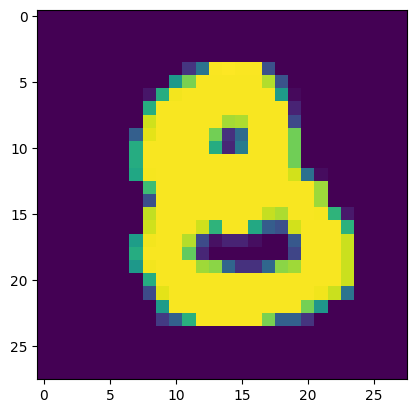

In [7]:
plt.imshow(inputs[0].permute(1, 2, 0))
plt.show()

In [2]:
import pandas as pd
import os
data_dir="/root/pj/data/KI67Patch/"
patch_info = pd.read_csv(os.path.join(data_dir, "patch_info.csv"))

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 假设你已经有了一个包含slide_name列的DataFrame：patch_info

# 1. 确定数据集划分
# 这里我们假设按照slide_name的唯一值数量的一定比例划分，你也可以根据其他规则进行划分
unique_slide_names = patch_info['slide_name'].unique()
train_slide_names, test_valid_slide_names = train_test_split(unique_slide_names, test_size=0.3, random_state=42)
valid_slide_names, test_slide_names = train_test_split(test_valid_slide_names, test_size=0.5, random_state=42)

# 2. 为每个slide_name添加一个新的列来表示它所属的数据集
patch_info['dataset'] = 'train'  # 先将所有数据标记为训练集
patch_info.loc[patch_info['slide_name'].isin(valid_slide_names), 'dataset'] = 'val'
patch_info.loc[patch_info['slide_name'].isin(test_slide_names), 'dataset'] = 'test'

# 输出前几行数据检查一下
print(patch_info.head())

# 3. 保存划分后的数据集
patch_info.to_csv(os.path.join(data_dir, "patch_info.csv"), index=False)


    slide_name  patch_idx  positive  negative      ki67  subtype  class_id  \
0  14-03785-KI          0        21       589  0.034426      NaN         1   
1  14-03785-KI          1        56       149  0.273171      NaN         3   
2  14-03785-KI          2        37       515  0.067029      NaN         1   
3  14-03785-KI          3        52       458  0.101961      NaN         2   
4  18-00074-KI          0        76       394  0.161702      NaN         2   

   num_hotspots dataset  
0             4    test  
1             4    test  
2             4    test  
3             4    test  
4             4   train  


In [3]:
patch_info.head()

,slide_name,patch_idx,positive,negative,ki67,subtype,class_id,num_hotspots,dataset
0,14-03785-KI,0,21,589,0.034426,NaN,1,4,test
1,14-03785-KI,1,56,149,0.273171,NaN,3,4,test
2,14-03785-KI,2,37,515,0.067029,NaN,1,4,test
3,14-03785-KI,3,52,458,0.101961,NaN,2,4,test
4,18-00074-KI,0,76,394,0.161702,NaN,2,4,train


In [22]:
patch_info = patch_info[patch_info["dataset"]=='train']

In [24]:
patch_info.reset_index(drop=True, inplace=True)

In [25]:
patch_info

,slide_name,patch_idx,positive,negative,ki67,subtype,class_id,num_hotspots,dataset
0,18-00074-KI,0,76,394,0.161702,NaN,2,4,train
1,18-00074-KI,1,83,321,0.205446,NaN,3,4,train
2,18-00074-KI,2,79,432,0.154599,NaN,2,4,train
3,18-00074-KI,3,63,400,0.136069,NaN,2,4,train
4,18-00552-KI,0,98,222,0.306250,NaN,3,3,train
...,...,...,...,...,...,...,...,...,...
932,D2021-25317 KI67,1,6,119,0.048000,NaN,1,2,train
933,D2021-26756 KI67,0,24,497,0.046065,NaN,1,2,train
934,D2021-26756 KI67,1,14,389,0.034739,NaN,1,2,train
935,D2021-30447 KI67,0,10,49,0.169492,NaN,2,2,train


In [4]:
patch_info['dataset'].value_counts()

dataset
train    937
test     188
val      184
Name: count, dtype: int64

In [5]:
row=patch_info.loc[0]
row

slide_name      14-03785-KI
patch_idx                 0
positive                 21
negative                589
ki67               0.034426
subtype                 NaN
class_id                  1
num_hotspots              4
dataset                test
Name: 0, dtype: object

In [18]:
from PIL import Image
import os
import numpy as np
import torch
img_path = os.path.join(data_dir,"raw", row["slide_name"]+"_"+str(row['patch_idx'])+ ".png")
img = Image.open(img_path).convert("RGB")
img=torch.tensor(np.array(img)).permute(2,0,1)/255.0

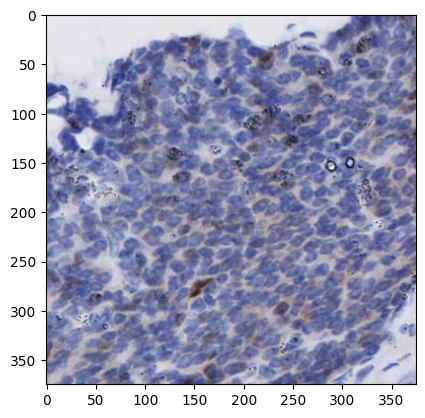

In [20]:
import matplotlib.pyplot as plt
plt.imshow(img.permute(1,2,0))

In [21]:
img

tensor([[[0.9098, 0.9098, 0.9098,  ..., 0.5647, 0.6471, 0.6980],
         [0.9098, 0.9098, 0.9176,  ..., 0.5333, 0.6157, 0.6510],
         [0.9098, 0.9176, 0.9176,  ..., 0.4902, 0.5569, 0.5922],
         ...,
         [0.5882, 0.6588, 0.7098,  ..., 0.6588, 0.6863, 0.6824],
         [0.6039, 0.6706, 0.7137,  ..., 0.6431, 0.6588, 0.6196],
         [0.6235, 0.6941, 0.7255,  ..., 0.6314, 0.6118, 0.5843]],

        [[0.8980, 0.8980, 0.8980,  ..., 0.5804, 0.6627, 0.7059],
         [0.8980, 0.8980, 0.8941,  ..., 0.5490, 0.6275, 0.6706],
         [0.8941, 0.8902, 0.8902,  ..., 0.5098, 0.5725, 0.6118],
         ...,
         [0.6078, 0.6588, 0.7020,  ..., 0.7020, 0.7255, 0.7216],
         [0.6235, 0.6706, 0.6980,  ..., 0.6784, 0.7020, 0.6627],
         [0.6431, 0.6941, 0.7137,  ..., 0.6667, 0.6627, 0.6353]],

        [[0.9333, 0.9255, 0.9255,  ..., 0.7255, 0.7686, 0.7569],
         [0.9412, 0.9412, 0.9412,  ..., 0.6863, 0.7569, 0.7569],
         [0.9490, 0.9529, 0.9529,  ..., 0.6353, 0.7176, 0.

# yaml

In [1]:
import yaml

# 读取YAML配置文件
with open("config.yaml", 'r') as stream:
    try:
        config_data = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

# 现在 config_data 中包含了从 YAML 文件中读取的配置信息



# 可以通过以下方式访问这些配置信息：
database_config = config_data['database']
print("Database host:", database_config['host'])
print("Database port:", database_config['port'])
print("Database username:", database_config['username'])
print("Database password:", database_config['password'])


Database host: localhost
Database port: 5432
Database username: user
Database password: pass


In [3]:
config_data.database

AttributeError: 'dict' object has no attribute 'database'